# Regresational simple

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("../data/Advertising.csv")
data.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
data = data.iloc[:, 1:]
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [8]:
data.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

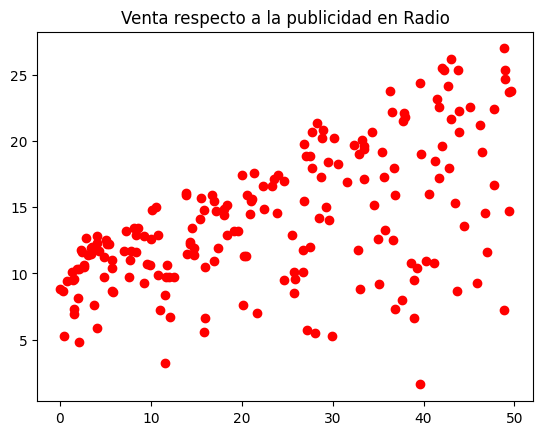

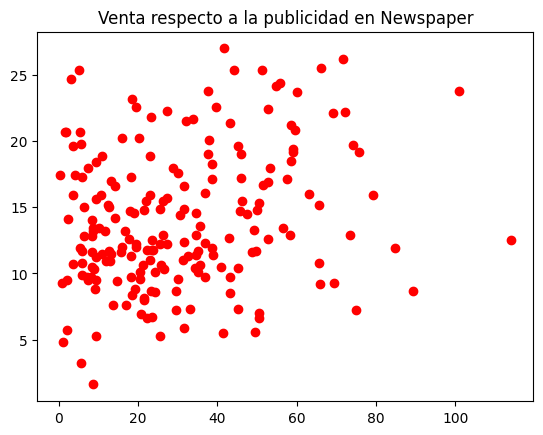

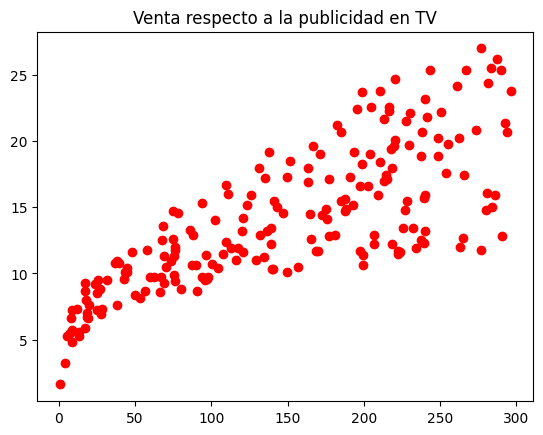

In [9]:
cols = ['Radio', 'Newspaper', 'TV']

for col in cols:
  plt.plot(data[col], data['Sales'], 'ro')
  plt.title("Venta respecto a la publicidad en %s" % col)
  plt.show()


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error

In [11]:
X = data['TV'].values.reshape(-1, 1)
Y = data['Sales'].values

### Dividir conjunto de datos entre test y entrenamiento

In [12]:
x_train, x_test, y_train, t_test = train_test_split(X,Y, test_size=0.2, random_state=42)
print(x_test.shape)
print(x_train.shape)

(40, 1)
(160, 1)


In [13]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)

LinearRegression()

In [14]:
predict = lin_reg.predict(x_test)
predict

array([14.71794394, 16.2115484 , 20.74819743,  7.66403631, 17.37013877,
       10.61402143, 17.2072847 ,  9.44612512, 17.46785121, 15.2669948 ,
        8.58532504,  9.73460946, 18.03086098,  7.37089899, 13.61053628,
       15.03899911,  7.45930549, 16.31391381, 10.62332738, 18.16579721,
       17.79821232, 10.27435438,  8.88776831, 18.79394862, 10.33019006,
        9.60897918, 17.05373658, 13.60123034, 11.17703121,  7.51048819,
       16.41627922, 10.339496  , 16.37440246,  7.90599093, 20.18053468,
       18.203021  ,  9.36702457, 19.85482655, 12.57292322,  8.39920611])

In [15]:
print("Predicciones: {} Reales: {}".format(predict[:4], t_test[:4]))

Predicciones: [14.71794394 16.2115484  20.74819743  7.66403631] Reales: [16.9 22.4 21.4  7.3]


In [16]:
# RMSE => is good is nearly to min Independent variable
rmse = root_mean_squared_error(predict, t_test)
print("rmse: ", rmse)
r2 = r2_score(predict, t_test)
print("r2: ", r2)

rmse:  3.194472431998898
r2:  0.42274365145319936


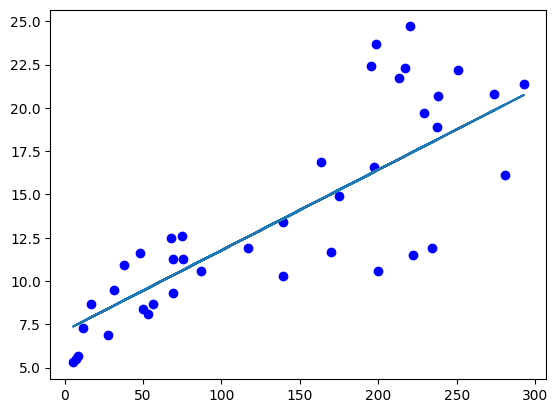

In [17]:
plt.plot(x_test, t_test, 'bo')
plt.plot(x_test, predict)
plt.show()

In [18]:
def modelos_simple(independient):
  X = data[independient].values.reshape(-1, 1)
  Y = data['Sales'].values
  
  x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

  lin_reg = LinearRegression()
  lin_reg.fit(x_train, y_train)
  predict = lin_reg.predict(x_test)

  rmse = root_mean_squared_error(predict, t_test)
  print("RMSE: ", rmse)
  r2 = r2_score(predict, t_test)
  print("R2: ", r2)
  
  plt.plot(x_test, t_test, 'bo')
  plt.plot(x_test, predict)
  plt.show()

RMSE:  4.8216974799471926
R2:  -1.502898961255247


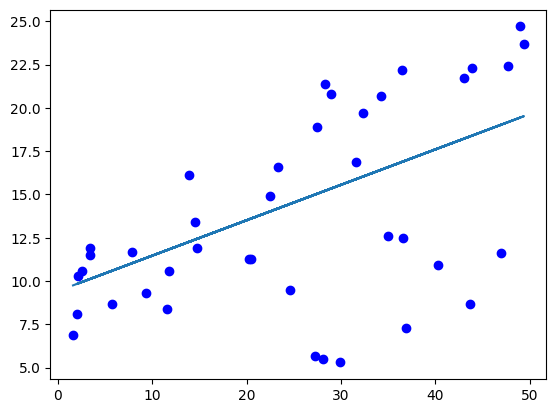

In [19]:
modelos_simple("Radio")

RMSE:  5.533600454969853
R2:  -11.10606617052994


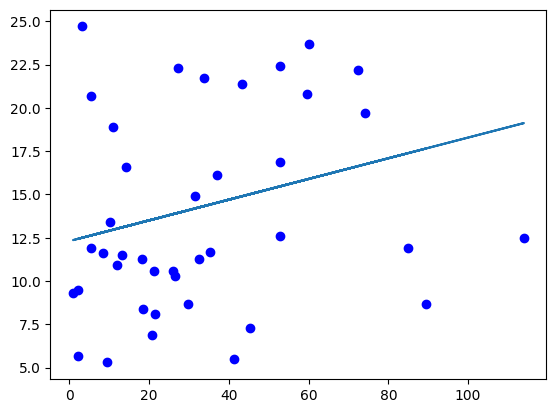

In [20]:
modelos_simple("Newspaper")